In [42]:
import os
import pandas as pd
import numpy as np
import time
import datetime
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SiHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [10]:
def data_read(data_path, file_name):
    '''
    获取数据集
    将标签有1,2转成0,1
    0表示好用户，1表示坏用户
    '''
    df = pd.read_csv(os.path.join(data_path, file_name), delim_whitespace=True, header=None)
     ##变量重命名
    columns = ['status_account','duration','credit_history','purpose', 'amount',
               'svaing_account', 'present_emp', 'income_rate', 'personal_status',
               'other_debtors', 'residence_info', 'property', 'age',
               'inst_plans', 'housing', 'num_credits',
               'job', 'dependents', 'telephone', 'foreign_worker', 'target']
    df.columns = columns
    df.target = df.target - 1
    
    return df

### 读取数据

In [20]:
# path = 'D:\\Repositories\\financial_big_data_risk_control_modeling_practice\\chapter4'
path = ''
file_name = 'german.csv'

df = data_read(path, file_name)

In [21]:
df.head()

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [8]:
def category_continue_separation(df, feature_names):
    '''
    将数据列以连续变量和非连续变量分开
    '''
    category_var = []
    numerical_var = []
    if 'target' in feature_names:
        feature_names.remove('target')
    
    numerical_var = list(df[feature_names].select_dtypes(include=['int','float','int32','float32','int64','float64']).columns.values)
    category_var = [x for x in feature_names if x not in numerical_var]
    
    return category_var, numerical_var

In [22]:
feature_names = list(df.columns)

In [23]:
feature_names

['status_account',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'svaing_account',
 'present_emp',
 'income_rate',
 'personal_status',
 'other_debtors',
 'residence_info',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker',
 'target']

In [24]:
feature_names.remove('target')

In [25]:
# 分开连续变量和非连续变量
categorical_var, numerical_var = category_continue_separation(df,feature_names)

In [26]:
df.describe()

,duration,amount,income_rate,residence_info,age,num_credits,dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


### 数据清洗-注入脏数据

In [11]:
def add_str(x):
    '''
    为x随机添加一个字符
    '''
    str_1 = ['%',' ','/t','$',';','@']
    str_2 = str_1[np.random.randint(0,high=len(str_1)-1)]
    
    return x + str_2

In [27]:
# 注入“脏数据”
df.status_account = df.status_account.apply(add_str)

In [28]:
df.status_account

0       A11 
1      A12/t
2       A14$
3      A11/t
4       A11%
       ...  
995     A14 
996    A11/t
997    A14/t
998     A11;
999     A12;
Name: status_account, Length: 1000, dtype: object

In [30]:
def add_time(num, style='%Y-%m-%d'):
    '''
    添加num个格式为style的时间字符串
    '''
    # 生成时间戳
    start_time = time.mktime((2010,1,1,0,0,0,0,0,0))
    stop_time = time.mktime((2015,1,1,0,0,0,0,0,0))
    re_time = []
    
    for i in range(num):
        rand_time = np.random.randint(start_time, stop_time)
        # 转成时间元组
        date_touple = time.localtime(rand_time)
        re_time.append(time.strftime(style, date_touple))
        
    return re_time

In [31]:
# 添加两列时间格式的数据
df['apply_time'] = add_time(df.shape[0], '%Y-%m-%d')
df['job_time'] = add_time(df.shape[0], "%Y/%m/%d %H:%M:%S")

In [32]:
df['apply_time']

0      2014-08-28
1      2013-05-09
2      2014-11-16
3      2012-06-03
4      2012-11-21
          ...    
995    2013-09-08
996    2011-12-17
997    2011-12-12
998    2012-04-26
999    2012-06-25
Name: apply_time, Length: 1000, dtype: object

In [33]:
df['job_time']

0      2011/10/06 16:39:54
1      2012/06/04 00:41:16
2      2014/02/04 14:21:32
3      2010/01/03 10:36:01
4      2014/10/06 09:57:53
              ...         
995    2014/09/22 19:33:51
996    2011/01/08 22:19:31
997    2013/11/29 11:35:13
998    2013/06/24 15:00:27
999    2014/07/20 18:25:25
Name: job_time, Length: 1000, dtype: object

In [18]:
def add_row(df_temp, num):
    '''
    从df_temp中随机取num行数据
    '''
    index_1 = np.random.randint(low=0,high=df_temp.shape[0]-1, size = num)
    return df_temp.loc[index_1]

In [34]:
# 添加冗余数据
df_temp = add_row(df, 10)
df = pd.concat([df, df_temp],axis=0,ignore_index=True)

In [35]:
df.shape

(1010, 23)

### 数据清洗

In [36]:
# 设置head（）方法显示多列或者显示全部
pd.set_option('display.max_columns', 10)
df.head()

,status_account,duration,credit_history,purpose,amount,...,telephone,foreign_worker,target,apply_time,job_time
0,A11,6,A34,A43,1169,...,A192,A201,0,2014-08-28,2011/10/06 16:39:54
1,A12/t,48,A32,A43,5951,...,A191,A201,1,2013-05-09,2012/06/04 00:41:16
2,A14$,12,A34,A46,2096,...,A191,A201,0,2014-11-16,2014/02/04 14:21:32
3,A11/t,42,A32,A42,7882,...,A191,A201,0,2012-06-03,2010/01/03 10:36:01
4,A11%,24,A33,A40,4870,...,A191,A201,1,2012-11-21,2014/10/06 09:57:53


In [37]:
pd.set_option('display.max_columns', None)
df.head()

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,residence_info,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,apply_time,job_time
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,2014-08-28,2011/10/06 16:39:54
1,A12/t,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1,2013-05-09,2012/06/04 00:41:16
2,A14$,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,2014-11-16,2014/02/04 14:21:32
3,A11/t,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,2012-06-03,2010/01/03 10:36:01
4,A11%,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,2012-11-21,2014/10/06 09:57:53


In [38]:
# 离散变量看下范围
df.status_account.unique()

array(['A11 ', 'A12/t', 'A14$', 'A11/t', 'A11%', 'A14;', 'A14/t', 'A12;',
       'A14 ', 'A12%', 'A12 ', 'A11$', 'A12$', 'A11;', 'A14%', 'A13 ',
       'A13$', 'A13%', 'A13;', 'A13/t'], dtype=object)

In [39]:
# 特殊字符清洗
df.status_account = df.status_account.apply(lambda x: x.replace(' ','').replace('%','').replace('/t','').replace('$','').replace('@','').replace(';',''))

In [40]:
df.status_account.unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [54]:
# 时间格式统一
# 统一为'%Y-%m-%d'
# df['job_time'] = df['job_time'].apply(lambda x:datetime.datetime.strptime( x, '%d/%m/%Y %H:%M:%S.%f))
df['job_time'] = add_time(df.shape[0], '%Y-%m-%d')

In [ ]:
df['apply_time'] = df['apply_time'].apply(lambda x:datetime.datetime.strptime( x, '%Y-%m-%d'))

In [50]:
df['apply_time']

0       2014-08-28
1       2013-05-09
2       2014-11-16
3       2012-06-03
4       2012-11-21
           ...    
1005    2012-06-23
1006    2012-10-10
1007    2010-10-02
1008    2014-01-01
1009    2010-03-20
Name: apply_time, Length: 1010, dtype: object

In [57]:
# 样本去冗余
df.drop_duplicates(subset=None, keep='first',inplace=True)

In [58]:
df.shape

(1010, 23)

In [59]:
# 按照订单去冗余
df['order_id'] = np.random.randint(low=0,high=df.shape[0]-1,size=df.shape[0])
df.drop_duplicates(subset=['order_id'],keep='first',inplace=True)

In [60]:
df.shape

(640, 24)

### 探索性数据分析

In [63]:
df[numerical_var].describe()

,duration,amount,income_rate,residence_info,age,num_credits,dependents
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.00000
mean,21.100000,3316.051562,2.956250,2.815625,35.364063,1.401563,1.14375
std,12.304662,2880.343871,1.122243,1.114876,11.596514,0.575720,0.35111
min,4.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.00000
25%,12.000000,1364.000000,2.000000,2.000000,26.000000,1.000000,1.00000
50%,18.000000,2300.000000,3.000000,3.000000,32.000000,1.000000,1.00000
75%,24.000000,4179.250000,4.000000,4.000000,42.000000,2.000000,1.00000
max,60.000000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.00000


In [65]:
df.reset_index(drop=True, inplace=True)

In [66]:
var_name = categorical_var + numerical_var

In [67]:
for i in var_name:
    num = np.random.randint(low=0,high = df.shape[0]-1)
    index_1 = np.random.randint(low = 0, high = df.shape[0] - 1, size=num)
    index_1 = np.unique(index_1)
    df[i].loc[index_1] = np.nan

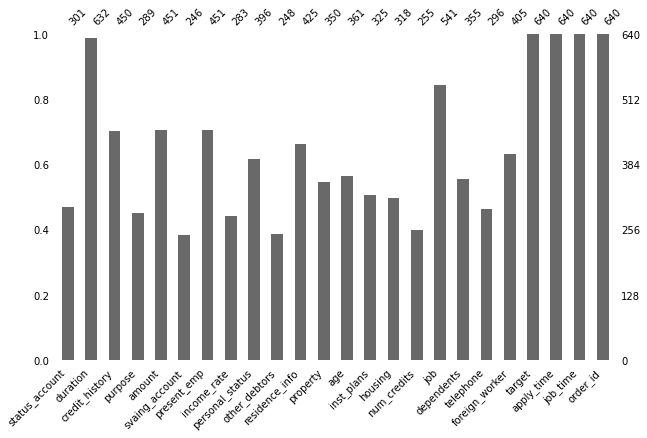

In [68]:
# 缺失值绘图
msno.bar(df, labels=True, figsize=(10,6),fontsize=10)

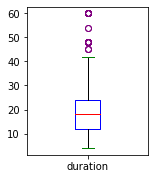

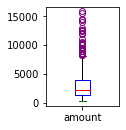

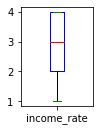

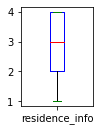

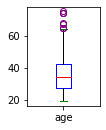

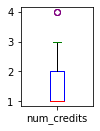

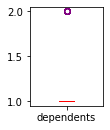

In [70]:
#对于连续数据绘制箱线图，观察是否有异常值 
plt.figure(figsize=(10,6)) # 设置图形尺寸大小
for j in range(1, len(numerical_var)+1):
    plt.subplot(2,4,j)
    df_temp = df[numerical_var[j-1]][~df[numerical_var[j-1]].isnull()]
    plt.boxplot(df_temp
                ,notch = False # 中位线处不设置凹陷
                ,widths=0.2    # 设置箱体宽度
                ,medianprops={'color':'red'}  # 中位线设置为红色
                ,boxprops=dict(color="blue")  # 箱体边框设置为蓝色
                ,labels=[numerical_var[j-1]]  # 设置标签
                ,whiskerprops={'color':'black'} # 设置须的颜色，黑色
                ,capprops={'color':'green'}     # 设置箱线图顶端和末端横线的属性，颜色为绿色
                ,flierprops={'color':'purple','markeredgecolor':'purple'} # 异常值属性
               )
    plt.show()

### 查看数据分布

In [72]:
# 连续变量不同类别下的分布
for i in numerical_var:
    df_temp = df.loc[~df[i].isnull(),[i,'target']] # 第一个为条件，第二个为要取的列
    df_good = df_temp[df_temp.target == 0]
    df_bad = df_temp[df_temp.target == 1]
    # 计算统计量
    valid = round(df_temp.shape[0] / df.shape[0]*100,2)
    Mean = round(df_temp[i].mean(),2)
    Std = round(df_temp[i].std(), 2)
    Max = round(df_temp[i].max(), 2)
    Min = round(df_temp[i].min(), 2)
    
    # 绘图
    plt.figure(figsize=(10,6))
    fontsize_1 = 12
    plt.hist(df_good[i], bins=20, alpha=0.5,label='好样本')
    plt.hist(df_bad[i], bins=20, alpha=0.5, label='坏样本')
    plt.ylabel(i, fontsize=fontsize_1)
    plt.title(f'valid={valid},Mean={Mean},Std={Std},Max={Max},Min={Min}')
    plt.legend()
    file = f"{i}.png"
    plt.savefig(file)
    plt.close(1)

In [76]:
# 离散变量不同类别下的分布
for i in categorical_var:
    df_temp = df.loc[~df[i].isnull(),[i,'target']]
    df_bad = df_temp[df_temp.target == 1]
    valid = round(df_temp.shape[0] / df.shape[0] * 100, 2)
    
    bad_rate = []
    bin_rate = []
    var_name = []
    
    for j in df[i].unique():
        if pd.isnull(j):
            df_1 = df[df[i].isnull()]
            bad_rate.append(sum(df_1.target) / df_1.shape[0])
            bin_rate.append(df_1.shape[0] / df.shape[0])
            var_name.append('NA')
        else:
            df_1 = df[df[i] == j]
            bad_rate.append(sum(df_1.target) / df_1.shape[0])
            bin_rate.append(df_1.shape[0] / df.shape[0])
            var_name.append(j)
            
    df_2 = pd.DataFrame({'var_name':var_name, 'bin_rate':bin_rate,'bad_rate':bad_rate})
    plt.figure(figsize=(10,6))        
    fontsize_1 = 12
    plt.bar(np.arange(1,df_2.shape[0]+1),df_2.bin_rate,0.1,color='black',alpha=0.5,label='占比')
    plt.xticks(np.arange(1,df_2.shape[0]+1),df_2.var_name)
    plt.plot(np.arange(1,df_2.shape[0]+1),df_2.bad_rate,color='green',alpha=0.5,label='坏样本率')
    plt.ylabel(i,fontsize=fontsize_1)
    plt.title(f'valid rate={valid}%')
    plt.legend()
    file = f"{i}.png"
    plt.savefig(file)
    plt.close(1)